**Project 2**

Kuei-Tzu Hu 206300553

Sreya Muppalla 505675909

Christina Lee 406299676

In [ ]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, homogeneity_score, v_measure_score, completeness_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# Part 1

In [ ]:
topics = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
data = fetch_20newsgroups(subset = 'all', categories=topics, remove=('headers', 'footers'))

**Question 1**

Dimensions of the TF-IDF matrix: (7882, 23522)

In [ ]:
count_vect = CountVectorizer(stop_words='english', min_df=3)
X_train_counts = count_vect.fit_transform(data.data)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(7882, 23522)


**Question 2**

The contingency matrix does not always have to be square shaped. For example in multiclass classification there can be a different number of actual classes versus the classes that are predicted. It will have dimensions based on the number of classes involved.

In [ ]:
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(3,3), if_show_values = True, colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = None, vmin=None, vmax=None):
  if size == (-1, -1):
    size = (mat.shape[1] / 3, mat.shape[0] / 3)

  fig = plt.figure(figsize=size)
  ax = fig.add_subplot(1,1,1)

  # im = ax.imshow(mat, cmap=plt.cm.Blues)
  im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, edgecolor=grid, vmin=vmin, vmax=vmax)
  if colorbar:
    plt.colorbar(im,fraction=0.046, pad=0.06)
  # tick_marks = np.arange(len(classes))
  # Ticks
  lda_num_topics = mat.shape[0]
  nmf_num_topics = mat.shape[1]
  yticks = np.arange(lda_num_topics)
  xticks = np.arange(nmf_num_topics)
  ax.set_xticks(xticks + 0.5)
  ax.set_yticks(yticks + 0.5)
  if xticklabels is None:
    xticklabels = [str(i) for i in xticks]
  if yticklabels is None:
    yticklabels = [str(i) for i in yticks]
  ax.set_xticklabels(xticklabels)
  ax.set_yticklabels(yticklabels)

  # Minor ticks
  # ax.set_xticks(xticks, minor=True);
  # ax.set_yticks(yticks, minor=True);
  # ax.set_xticklabels([], minor=True)
  # ax.set_yticklabels([], minor=True)
  # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)

  # tick labels on all four sides
  ax.tick_params(labelright = True, labeltop = False)

  if ylabel:
    plt.ylabel(ylabel, fontsize=15)
  if xlabel:
    plt.xlabel(xlabel, fontsize=15)
  if title:
    plt.title(title, fontsize=15)

  # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
  ax.invert_yaxis()

  # thresh = mat.max() / 2

  def show_values(pc, fmt="%.3f", **kw):
    pc.update_scalarmappable()
    ax = pc.axes
    for p, color, value in itertools.zip_longest(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
      x, y = p.vertices[:-2, :].mean(0)
      if np.all(color[:3] > 0.5):
        color = (0.0, 0.0, 0.0)
      else:
        color = (1.0, 1.0, 1.0)
      ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw,fontsize=10)
  if if_show_values:
    show_values(im)
  # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
  # ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
  # horizontalalignment="center",
  # color="white" if mat[i, j] > thresh else "black")

  plt.tight_layout()
  if pic_fname:
    plt.savefig(pic_fname, dpi=300, transparent=True)
  plt.show()
  plt.close()


In [ ]:
from sklearn.metrics.cluster import contingency_matrix
from sklearn.cluster import KMeans

actual_y = [i//4 for i in data.target]

kmeans = KMeans(n_clusters=2, max_iter=1000, n_init=30)
pred_y = kmeans.fit_predict(X_train_tfidf)
cont_matrix = contingency_matrix(actual_y,pred_y)

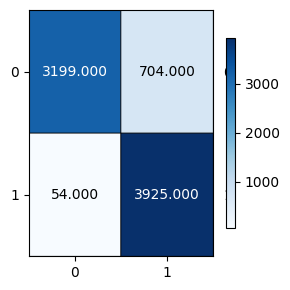

In [ ]:
plot_mat(cont_matrix)

**Question 3**

The scores are reported below:

Adjusted mutual information score:  0.5949789645310989

Adjusted Rand score:  0.6522758110761804

Homogeneity score:  0.588461885635887

V-measure score:  0.5950164541990309

Completeness score:  0.6017186832840086

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, homogeneity_score, v_measure_score, completeness_score

print("Adjusted mutual information score: ",adjusted_mutual_info_score(actual_y,pred_y))
print("Adjusted Rand score: ",adjusted_rand_score(actual_y,pred_y))
print("Homogeneity score: ", homogeneity_score(actual_y,pred_y))
print("V-measure score: ",v_measure_score(actual_y,pred_y))
print("Completeness score: ",completeness_score(actual_y,pred_y))

Adjusted mutual information score:  0.5949789645310989
Adjusted Rand score:  0.6522758110761804
Homogeneity score:  0.588461885635887
V-measure score:  0.5950164541990309
Completeness score:  0.6017186832840086


**Question 4**

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd_evr = TruncatedSVD(n_components=1000)
X_train_reduced = svd_evr.fit_transform(X_train_tfidf)

Text(0, 0.5, 'Explained ratio variance')

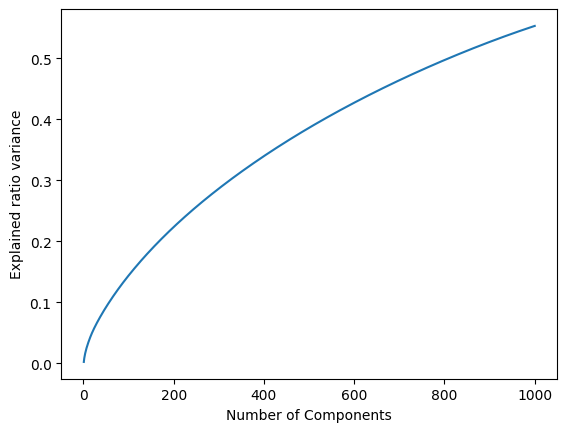

In [ ]:
plt.plot(np.arange(1000)+1,svd_evr.explained_variance_ratio_.cumsum())
plt.xlabel("Number of Components");
plt.ylabel("Explained ratio variance")

**Question 5**

Good Choice for R for SVD: 100

Good Choice for R for NMF: 2

Text(0.5, 1.0, 'SVD Score Metrics')

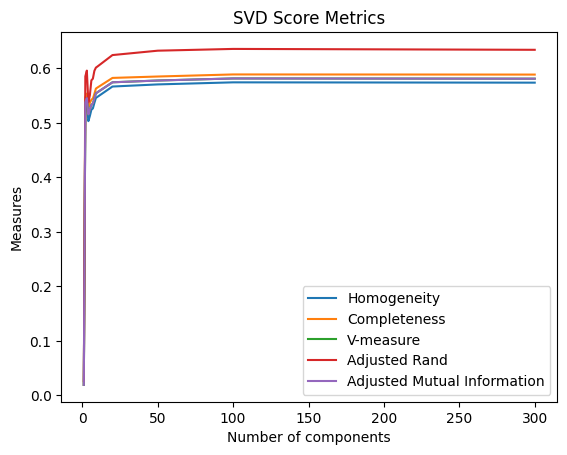

In [ ]:
poss_r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
all_hom = []
all_complet = []
all_v = []
all_adj_rand = []
all_adj_mut_inf = []
for r in poss_r:
  svd = TruncatedSVD(n_components=r)
  reduced = svd.fit_transform(X_train_tfidf)
  pred_y = kmeans.fit_predict(reduced)
  all_hom.append(homogeneity_score(actual_y,pred_y))
  all_complet.append(completeness_score(actual_y,pred_y))
  all_v.append(v_measure_score(actual_y,pred_y))
  all_adj_rand.append(adjusted_rand_score(actual_y,pred_y))
  all_adj_mut_inf.append(adjusted_mutual_info_score(actual_y,pred_y))

fig, ax = plt.subplots()
ax.plot(poss_r,all_hom, label='Homogeneity')
ax.plot(poss_r, all_complet, label='Completeness')
ax.plot(poss_r, all_v, label='V-measure')
ax.plot(poss_r,all_adj_rand,label='Adjusted Rand')
ax.plot(poss_r,all_adj_mut_inf, label='Adjusted Mutual Information')
ax.legend(loc='best')
plt.xlabel("Number of components")
plt.ylabel("Measures");
plt.title("SVD Score Metrics")

In [ ]:
print("SVD")
print(all_hom)
print(all_complet)
print(all_v)
print(all_adj_rand)
print(all_adj_mut_inf)

SVD
[0.019096193923968514, 0.5290568591667072, 0.5371352366502093, 0.5030528872950297, 0.5124799770662565, 0.5239219943949754, 0.5263787702409716, 0.5364702886260979, 0.5455819022758501, 0.5475492679846266, 0.566568437426003, 0.5704687479252654, 0.5742537772924552, 0.5736906948793236]
[0.019424232697599873, 0.5466431001230211, 0.5537146886789862, 0.5283850694664373, 0.5363748027677557, 0.5423608376746923, 0.544542750494941, 0.5529862276905418, 0.562774091282195, 0.5646704937854108, 0.5823768459620671, 0.5849519708894831, 0.5887504944765372, 0.5885048109042065]
[0.01925881652670827, 0.5377062240054302, 0.5452989699761482, 0.5154078983737596, 0.5241552060521457, 0.532981987911606, 0.5353067200520797, 0.5446030690208484, 0.5540446590407202, 0.5559781010052695, 0.5743638872633166, 0.5776195856554346, 0.5814117859114925, 0.5810033376094367]
[0.02608488148297705, 0.585225410661106, 0.5957562066257983, 0.53769534393471, 0.550424300845874, 0.5778711366972836, 0.580962008813044, 0.5953644999156

Text(0.5, 1.0, 'NMF Score Metrics')

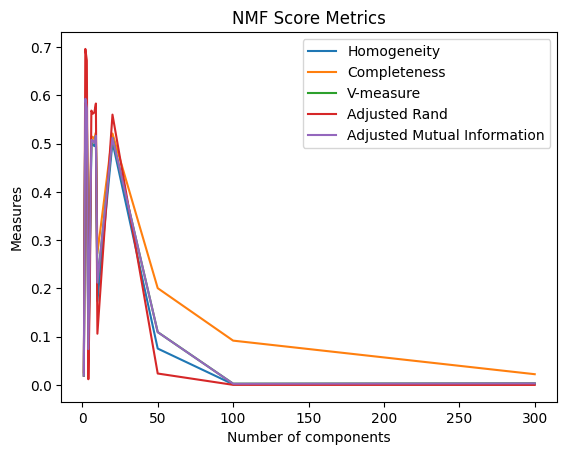

In [ ]:
from sklearn.decomposition import NMF

poss_r = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
all_hom = []
all_complet = []
all_v = []
all_adj_rand = []
all_adj_mut_inf = []
for r in poss_r:
  nmf = NMF(n_components=r)
  reduced = nmf.fit_transform(X_train_tfidf)
  pred_y = kmeans.fit_predict(reduced)
  all_hom.append(homogeneity_score(actual_y,pred_y))
  all_complet.append(completeness_score(actual_y,pred_y))
  all_v.append(v_measure_score(actual_y,pred_y))
  all_adj_rand.append(adjusted_rand_score(actual_y,pred_y))
  all_adj_mut_inf.append(adjusted_mutual_info_score(actual_y,pred_y))

fig, ax = plt.subplots()
ax.plot(poss_r,all_hom, label='Homogeneity')
ax.plot(poss_r, all_complet, label='Completeness')
ax.plot(poss_r, all_v, label='V-measure')
ax.plot(poss_r,all_adj_rand,label='Adjusted Rand')
ax.plot(poss_r,all_adj_mut_inf, label='Adjusted Mutual Information')
ax.legend(loc='best')
plt.xlabel("Number of components")
plt.ylabel("Measures");
plt.title("NMF Score Metrics")

In [ ]:
print("NMF")
print(all_hom)
print(all_complet)
print(all_v)
print(all_adj_rand)
print(all_adj_mut_inf)

NMF
[0.019040345186437314, 0.5924052178662683, 0.571964768502695, 0.0478894086185501, 0.25237744829807296, 0.5006103911725807, 0.4981309476292966, 0.49501073087650027, 0.5103640144416155, 0.17360104220942446, 0.5031739025983972, 0.07527152459454531, 0.001287719557284094, 0.0017907521907223854]
[0.019373010847691004, 0.5939554127512687, 0.5749266623105408, 0.16476153146633502, 0.32650230586382484, 0.514960969107947, 0.513868313365936, 0.508822534264248, 0.5229564919380246, 0.272770470376064, 0.5211440987157528, 0.20047349213771662, 0.09172942657306825, 0.022121728829021674]
[0.01920523754877913, 0.5931793025036739, 0.5734418908009519, 0.07420923981676063, 0.28469407756935783, 0.5076842893886468, 0.5058772664357665, 0.5018216138459274, 0.5165835245811654, 0.2121696237600764, 0.5120013699466501, 0.10944854469410262, 0.002539785007186993, 0.003313293533232974]
[0.02600279267228016, 0.6964515122674229, 0.6725166723140447, 0.011695995753767235, 0.20298968653560295, 0.5686478147251656, 0.5621

**Question 6**

KMeans tend to not perform well with higher dimensionality when training on data. As we increase the number of components, the dimensions when clustering KMeans rise too. This issue in poor performance with higher dimensionality can be seen when the Euclidean distance becomes not as useful in higher dimensions(since points will be shown to be equidistant). As shown on the graph, after a certain r value, increasing the number of components doesn't provide any useful information to KMeans, which results in the non-monotonic behavior.

**Question 7**

Homogeneity: The one computed in question 3 has a higher score(0.588461885635885), then SVD has next higher score on average(0.5046932167962661), then NMF has the lowest(0.3030655866958848).

Completeness: The one computed in question 3 has a higher score(0.6017186832840064), then SVD has next higher score on average(0.5211757440638475), then NMF has the lowest(0.3463118891819598).

V-measure: The one computed in question 3 has a higher score(0.5950164541990287), then SVD has next higher score on average(0.5127957320288846), then NMF has the lowest(0.3154406471023053).

Adjusted Rand: The one computed in question 3 has a higher score(0.6522758110761804), then SVD has next higher score on average(0.5557170228457285), then NMF has the lowest(0.32702788825233003).

Adjusted mutual information: The one computed in question 3 has a higher score(0.5949789645310966), then SVD has next higher score on average(0.5127504484374558), then NMF has the lowest(0.31535720287040236).

**Question 8**

Text(0.5, 1.0, 'NMF Labeled Predictions Clustering(R=2)')

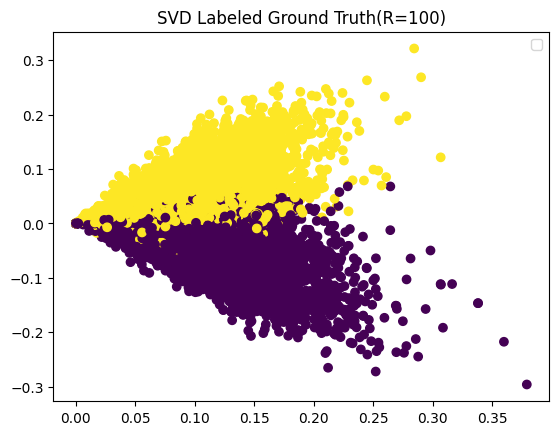

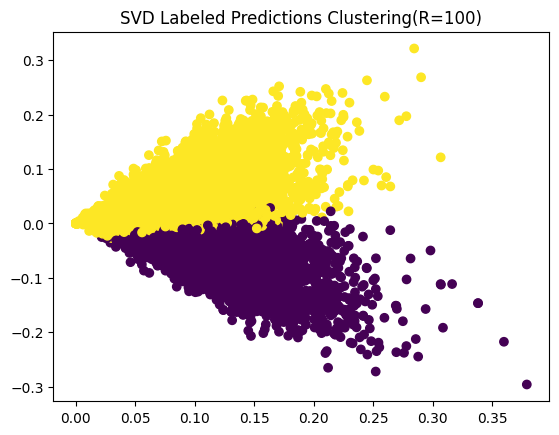

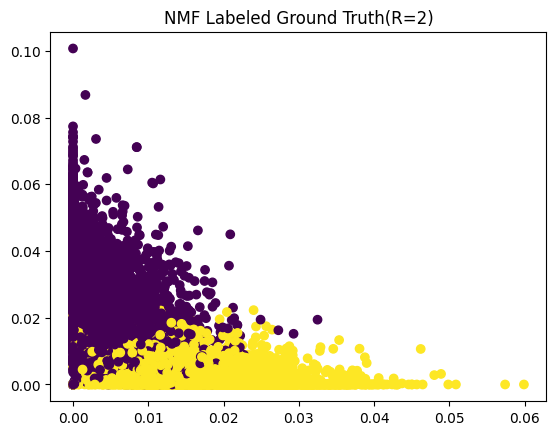

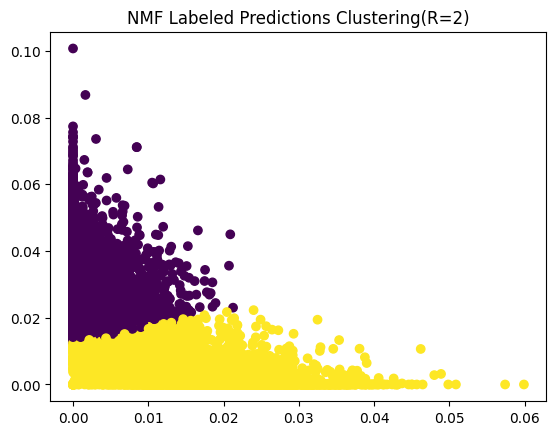

In [ ]:
svd_r = 100
nmf_r = 2

best_svd = TruncatedSVD(n_components=svd_r).fit_transform(X_train_tfidf)
plt.figure()
plt.scatter(best_svd[:,0],best_svd[:,1],c=actual_y)
plt.title("SVD Labeled Ground Truth(R=100)")
plt.legend()

model = KMeans(n_clusters=2, max_iter=1000, n_init=30)
svd_pred = model.fit_predict(best_svd)
plt.figure()
plt.scatter(best_svd[:,0],best_svd[:,1],c=svd_pred)
plt.title("SVD Labeled Predictions Clustering(R=100)")

best_nmf = NMF(n_components=nmf_r,init='random',random_state=0).fit_transform(X_train_tfidf)
plt.figure()
plt.scatter(best_nmf[:,0],best_nmf[:,1],c=actual_y)
plt.title("NMF Labeled Ground Truth(R=2)")

nmf_pred = model.fit_predict(best_nmf)
plt.figure()
plt.scatter(best_nmf[:,0],best_nmf[:,1],c=nmf_pred)
plt.title("NMF Labeled Predictions Clustering(R=2)")

**Question 9**

CHECK!!In all the graphs there seems to be a sort of clear division of data. I would say the distribution of the data is ideal for K-Means clustering since just by observation we can see that there are two separate areas for the data. My only concern is that there could be some overlap between both classes, which might result in some error for K-Means Clustering.

**Question 10**

Load documents with the same configuration as in Question 1, but for
ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality using BOTH NMF
and SVD (specify settings you choose and why), and perform K-Means clustering with k=20 .
Visualize the contingency matrix and report the five clustering metrics (DO BOTH
NMF AND SVD).

In [ ]:
dataset = fetch_20newsgroups(subset = 'all',shuffle = True,remove=('headers','footers'))
count_vect = CountVectorizer(stop_words='english',min_df=3)
tfidf_transformer = TfidfTransformer()
X_train_counts = count_vect.fit_transform(dataset.data)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
X_train_tfidf.shape

(18846, 45365)

In [ ]:
dataset.target

array([10,  3, 17, ...,  3,  1,  7])

For SVD we choose the setting n_components equal to 100. From the plot in question 5, we can see that this setting has the highest clustering metrics.

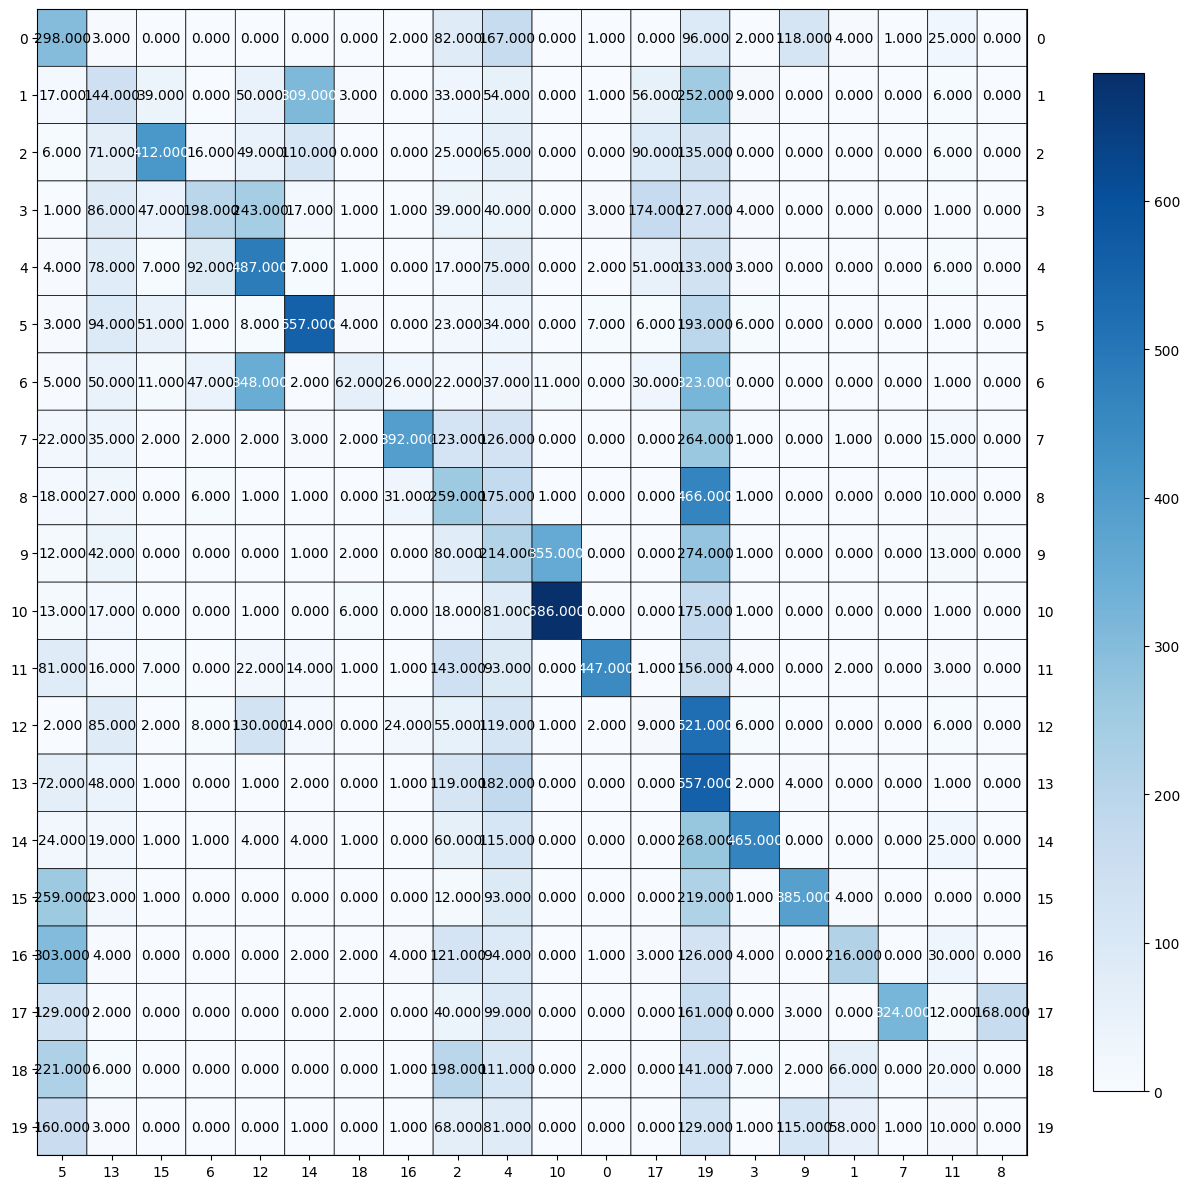

Homogeneity: 0.328
Completeness: 0.380
V-measure: 0.352
Adjusted Rand-Index: 0.117
Adjusted Mutual Information Score: 0.349


In [ ]:
svd = TruncatedSVD(n_components=100)
X_train_svd = svd.fit_transform(X_train_tfidf)
km = KMeans(n_clusters=20, max_iter=1000, n_init=30)
pred_svd = km.fit_predict(X_train_svd)
cm = contingency_matrix(dataset.target, pred_svd)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(12,12))

print("Homogeneity: %0.3f" % homogeneity_score(dataset.target, pred_svd))
print("Completeness: %0.3f" % completeness_score(dataset.target, pred_svd))
print("V-measure: %0.3f" % v_measure_score(dataset.target, pred_svd))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, pred_svd))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, pred_svd))


Likewise for NMF, we choose the setting n_components = 2 because the plot in question 5 shows it has the highest values for the clustering metrics.

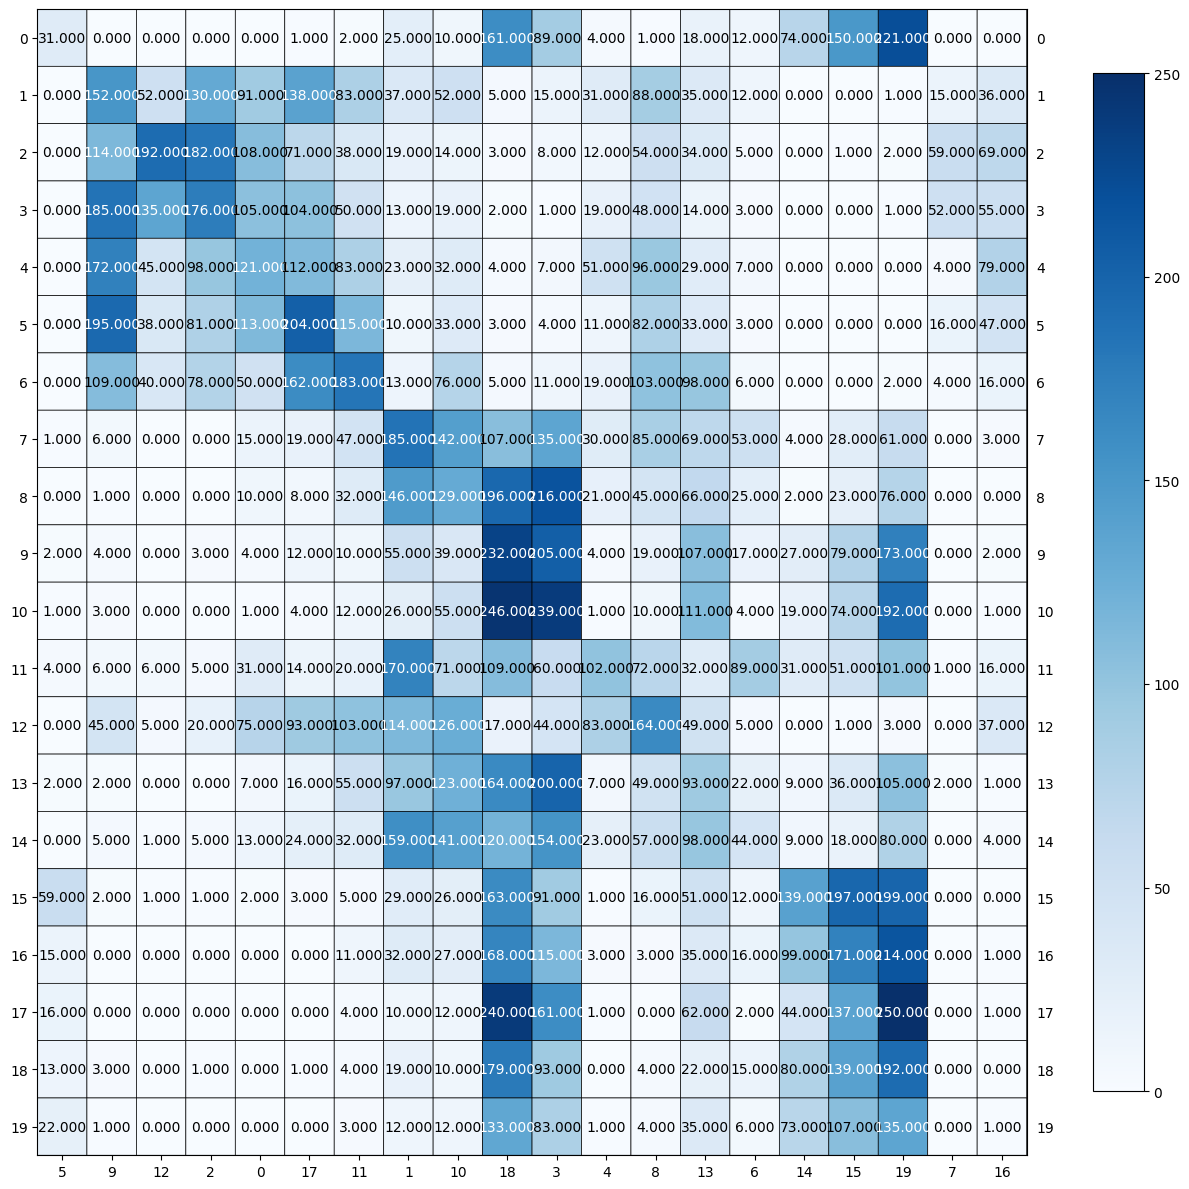

Homogeneity: 0.190
Completeness: 0.202
V-measure: 0.196
Adjusted Rand-Index: 0.056
Adjusted Mutual Information Score: 0.193


In [ ]:
nmf = NMF(n_components=2)
X_train_nmf = nmf.fit_transform(X_train_tfidf)
km = KMeans(n_clusters=20, max_iter=1000, n_init=30)
pred_nmf = km.fit_predict(X_train_nmf)
cm = contingency_matrix(dataset.target,pred_nmf)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(12,12))

print("Homogeneity: %0.3f" % homogeneity_score(dataset.target, pred_nmf))
print("Completeness: %0.3f" % completeness_score(dataset.target, pred_nmf))
print("V-measure: %0.3f" % v_measure_score(dataset.target, pred_nmf))
print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, pred_nmf))
print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, pred_nmf))

**QUESTION 11**

Reduce the dimension of your dataset with UMAP. Consider the following
settings: n components = [5, 20, 200], metric = ”cosine” vs. ”euclidean”. If ”cosine” metric
fails, please look at the FAQ at the end of this spec.
Report the permuted contingency matrix and the five clustering evaluation metrics
for the different combinations (6 combinations).

In [ ]:
!pip install umap-learn

!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9a7b63fa268b405e1b75898f28ca3f3bb20dad2e9d532a9bd0e8d962abd572cc
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.1 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipykerne

In [ ]:
import umap
import umap.plot

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


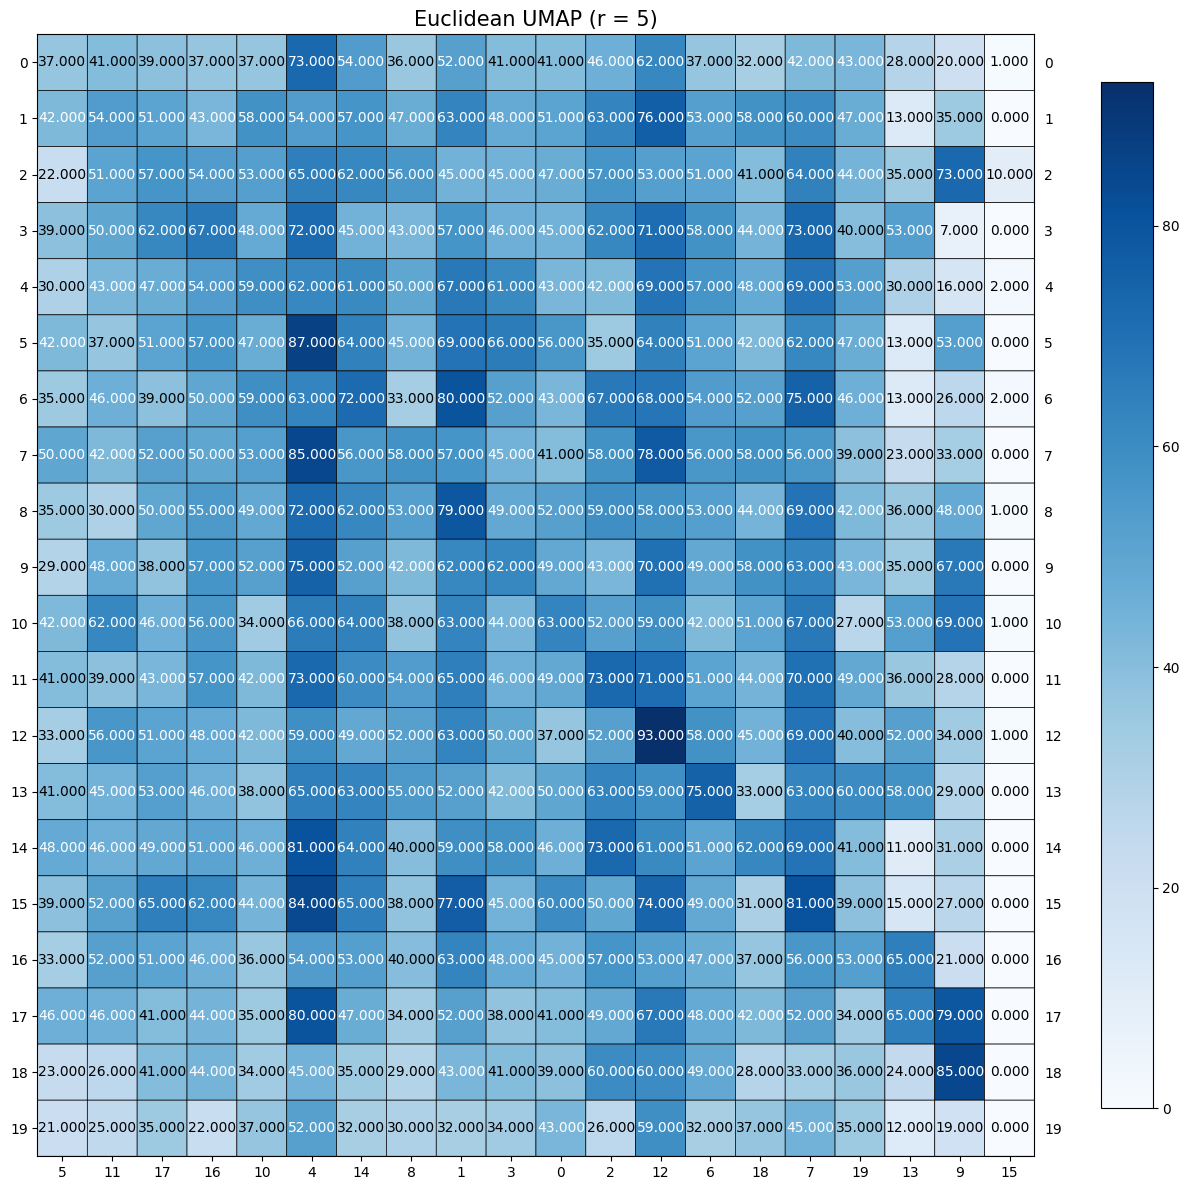

Euclidean - Homogeneity: 0.008
Euclidean - Completeness: 0.008
Euclidean - V-measure: 0.008
Euclidean - Adjusted Rand-Index: 0.001
Euclidean - Adjusted Mutual Information Score: 0.005


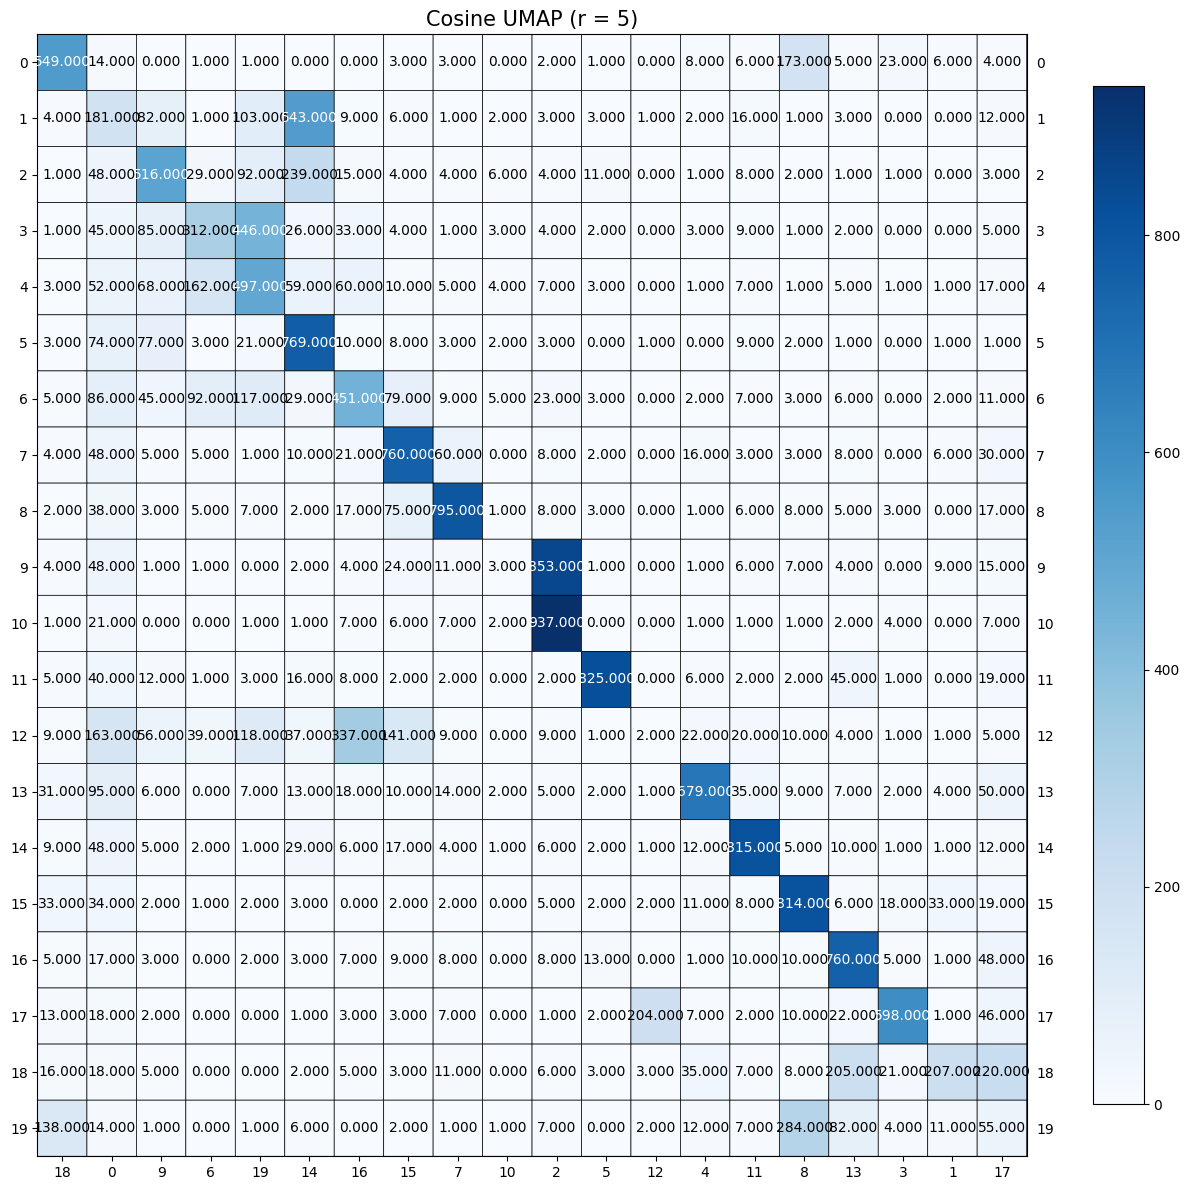

Cosine - Homogeneity: 0.553
Cosine - Completeness: 0.579
Cosine - V-measure: 0.566
Cosine - Adjusted Rand-Index: 0.428
Cosine - Adjusted Mutual Information Score: 0.564


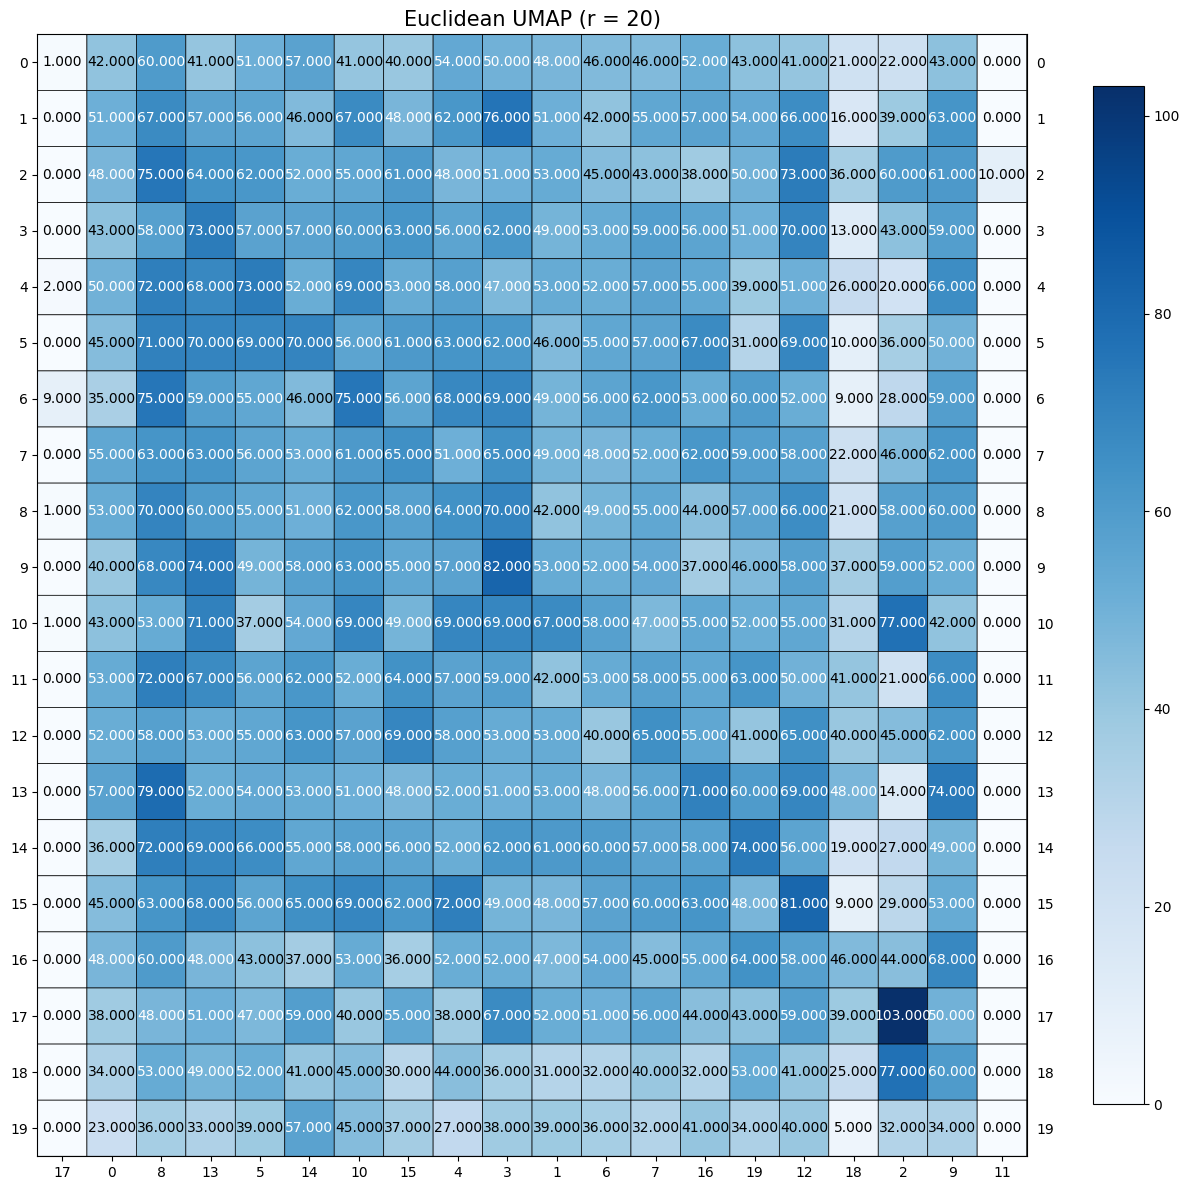

Euclidean - Homogeneity: 0.007
Euclidean - Completeness: 0.008
Euclidean - V-measure: 0.007
Euclidean - Adjusted Rand-Index: 0.001
Euclidean - Adjusted Mutual Information Score: 0.004


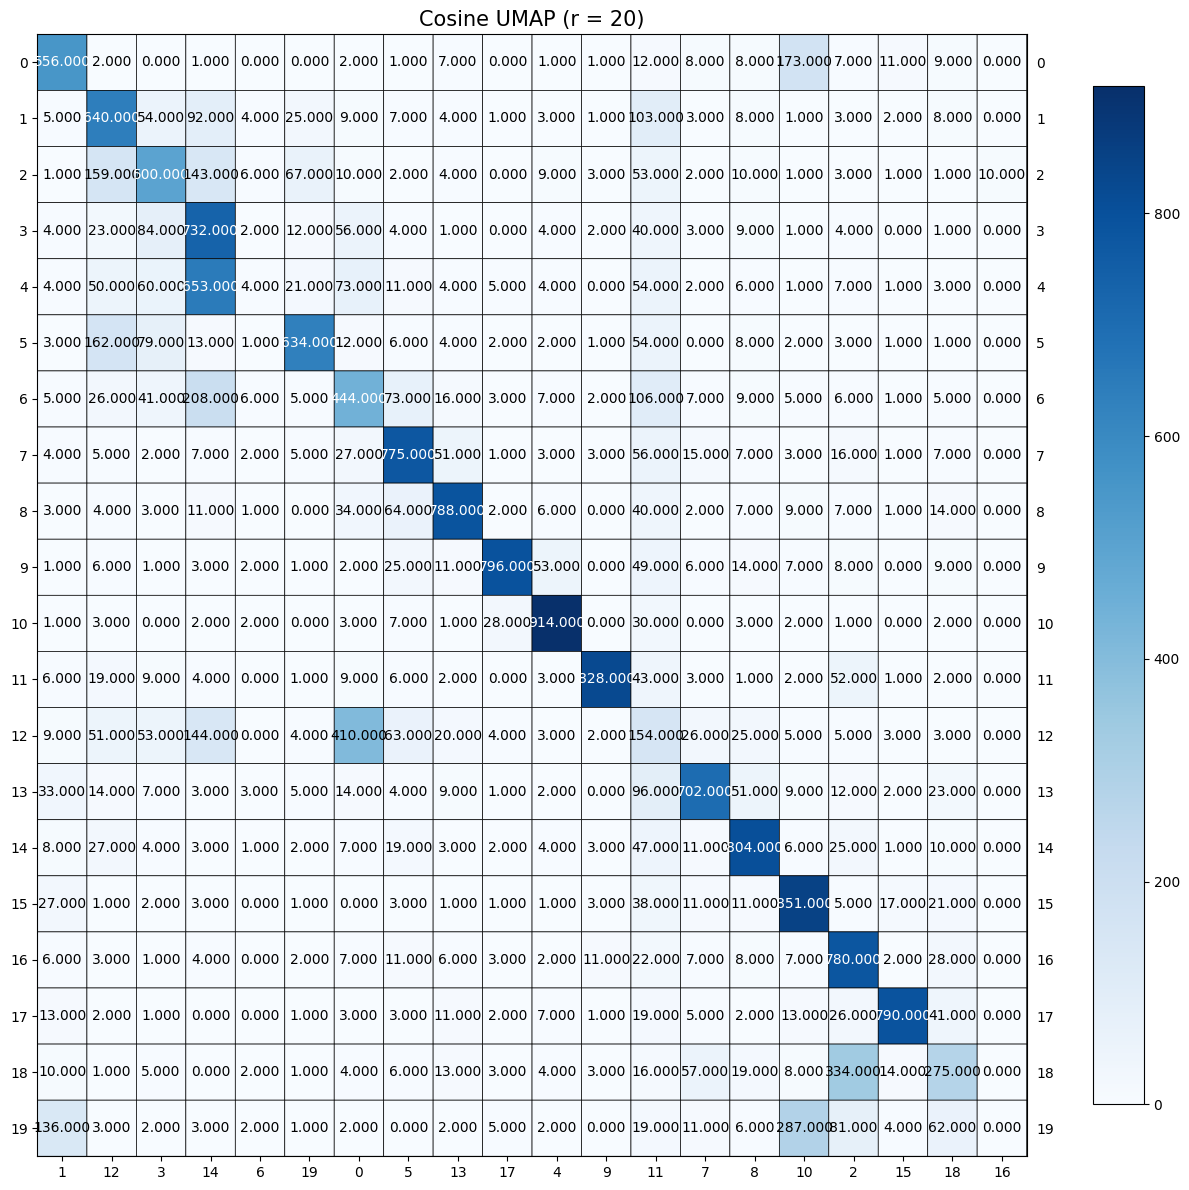

Cosine - Homogeneity: 0.578
Cosine - Completeness: 0.604
Cosine - V-measure: 0.591
Cosine - Adjusted Rand-Index: 0.469
Cosine - Adjusted Mutual Information Score: 0.590


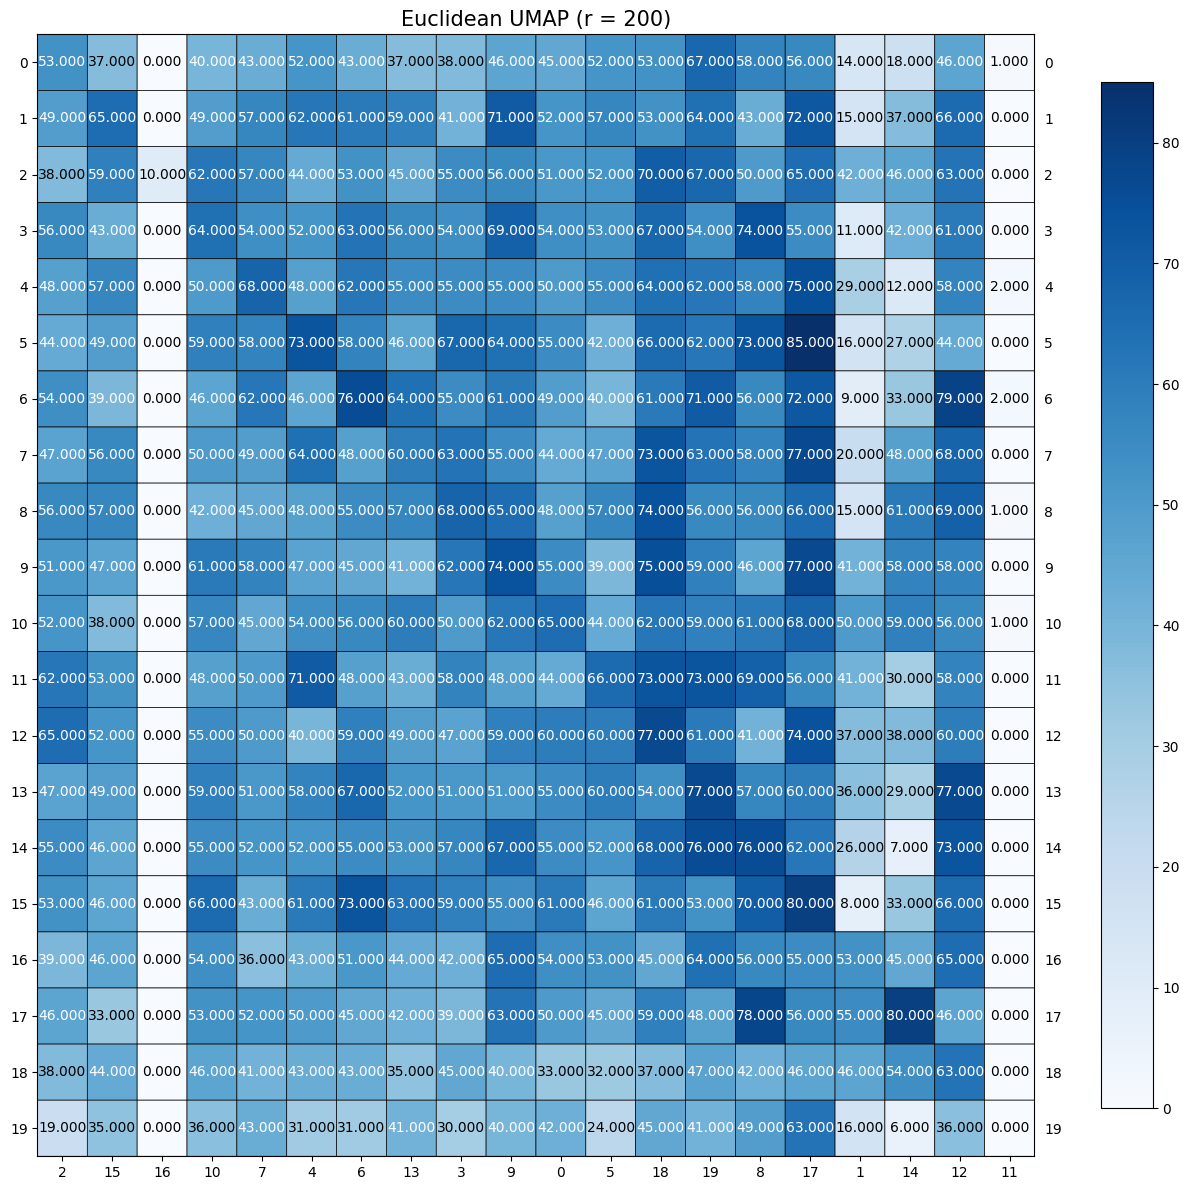

Euclidean - Homogeneity: 0.007
Euclidean - Completeness: 0.007
Euclidean - V-measure: 0.007
Euclidean - Adjusted Rand-Index: 0.001
Euclidean - Adjusted Mutual Information Score: 0.004


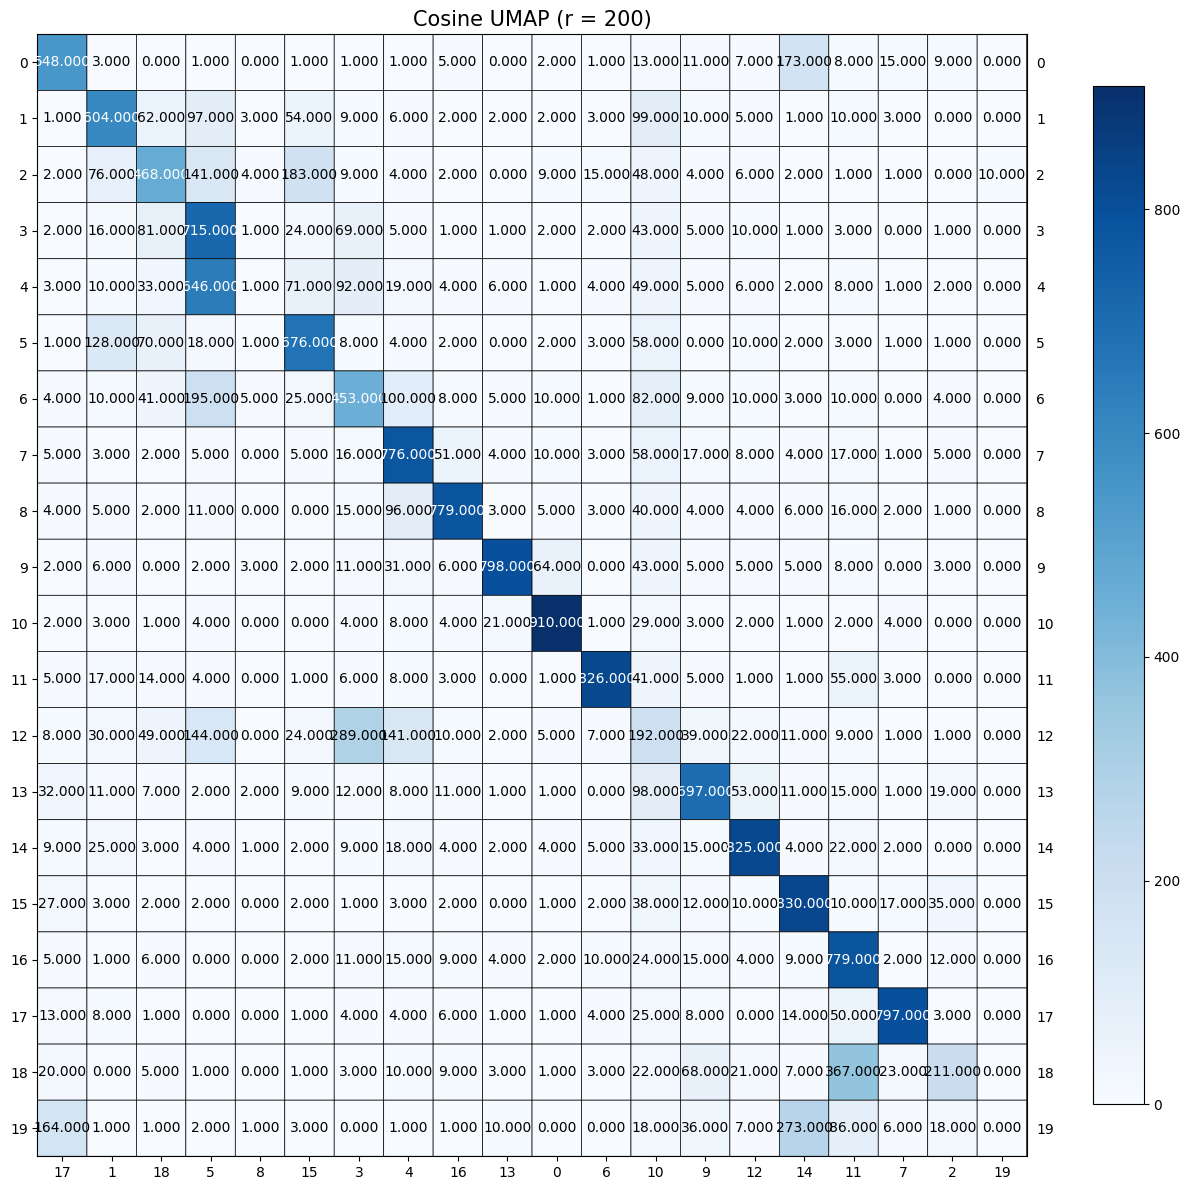

Cosine - Homogeneity: 0.569
Cosine - Completeness: 0.597
Cosine - V-measure: 0.582
Cosine - Adjusted Rand-Index: 0.460
Cosine - Adjusted Mutual Information Score: 0.581


In [ ]:
poss_n = [5, 20, 200]
km = KMeans(n_clusters=20, max_iter=1000, n_init=30)

for n in poss_n:
  Umap_euc = umap.UMAP(n_components=n, metric='euclidean').fit_transform(X_train_tfidf)
  kmean_euc = km.fit(Umap_euc)
  cm = contingency_matrix(dataset.target, kmean_euc.labels_)
  rows, cols = linear_sum_assignment(cm, maximize=True)
  plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Euclidean UMAP (r = %i)' %n, size=(12,12))
  print("Euclidean - Homogeneity: %0.3f" % homogeneity_score(dataset.target, kmean_euc.labels_))
  print("Euclidean - Completeness: %0.3f" % completeness_score(dataset.target, kmean_euc.labels_))
  print("Euclidean - V-measure: %0.3f" % v_measure_score(dataset.target, kmean_euc.labels_))
  print("Euclidean - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, kmean_euc.labels_))
  print("Euclidean - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, kmean_euc.labels_))

  Umap_cos = umap.UMAP(n_components=n, metric='cosine').fit_transform(X_train_tfidf)
  kmean_cos = km.fit(Umap_cos)
  cm = contingency_matrix(dataset.target, kmean_cos.labels_)
  rows, cols = linear_sum_assignment(cm, maximize=True)
  plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'Cosine UMAP (r = %i)' %n, size=(12,12))
  print("Cosine - Homogeneity: %0.3f" % homogeneity_score(dataset.target, kmean_euc.labels_))
  print("Cosine - Completeness: %0.3f" % completeness_score(dataset.target, kmean_euc.labels_))
  print("Cosine - V-measure: %0.3f" % v_measure_score(dataset.target, kmean_euc.labels_))
  print("Cosine - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, kmean_euc.labels_))
  print("Cosine - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, kmean_euc.labels_))

**QUESTION 12**

*Analyze the contingency matrices. Which setting works best and why?
What about for each metric choice?*

Cosine metric with 200 n components works the best. From the contingency matrices we can see that this setting has the most prominent diagonal and the five clustering measures are also the highest.

For both metrics, euclidean and cosine, the best setting is n components of 200. This makes sense since the more n components there are, the closer the data is to the original dimensions.

**QUESTION 13**

*So far, we have attempted K-Means clustering with 4 different representation
 learning techniques (sparse TF-IDF representation, PCA-reduced, NMF-reduced, UMAP-reduced).
 Compare and contrast the clustering results across the 4 choices, and suggest an approach that is
 best for the K-Means clustering task on the 20-class text data. Choose any choice of clustering
 metrics for your comparison.*

 Umap with cosine metric is by far the best approach for clustering with kmeans on the 20-class text data. The 2nd best is SVD, then NMF, and finally umap with euclidean metric is the worst. This ranking is true for any of the five clustering metrics.

 **QUESTION 14**

 Use UMAP to reduce the dimensionality properly, and perform Agglomerative clustering with
 n_clusters=20 . Compare the performance of “ward” and “single”
 linkage criteria.
 Report the five clustering evaluation metrics for each case.

In [ ]:
  Umap_cos = umap.UMAP(n_components=200, metric='cosine').fit_transform(X_train_tfidf)

In [ ]:
ac_ward = AgglomerativeClustering(n_clusters=20, linkage='ward').fit(Umap_cos)
ac_single = AgglomerativeClustering(n_clusters=20, linkage='single').fit(Umap_cos)

print("Ward - Homogeneity: %0.3f" % homogeneity_score(dataset.target, ac_ward.labels_))
print("Ward - Completeness: %0.3f" % completeness_score(dataset.target, ac_ward.labels_))
print("Ward - V-measure: %0.3f" % v_measure_score(dataset.target, ac_ward.labels_))
print("Ward - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, ac_ward.labels_))
print("Ward - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, ac_ward.labels_))
print()
print("Single - Homogeneity: %0.3f" % homogeneity_score(dataset.target, ac_single.labels_))
print("Single - Completeness: %0.3f" % completeness_score(dataset.target, ac_single.labels_))
print("Single - V-measure: %0.3f" % v_measure_score(dataset.target, ac_single.labels_))
print("Single - Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, ac_single.labels_))
print("Single - Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, ac_single.labels_))

Ward - Homogeneity: 0.547
Ward - Completeness: 0.584
Ward - V-measure: 0.565
Ward - Adjusted Rand-Index: 0.419
Ward - Adjusted Mutual Information Score: 0.564

Single - Homogeneity: 0.016
Single - Completeness: 0.374
Single - V-measure: 0.031
Single - Adjusted Rand-Index: 0.000
Single - Adjusted Mutual Information Score: 0.027


Ward linkage criteria produces better results in all five clustering metrics.

**QUESTION 15**

Apply HDBSCAN on UMAP-transformed 20-category data

In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 21.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039276 sha256=9550a7195e3e205aec859f046044c1cc1c5559ac484b6f000cea9d46ec119e9b
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [ ]:
import hdbscan

In [ ]:
min_cluster = [20, 100, 200]

for m in min_cluster:
  hdb = hdbscan.HDBSCAN(min_cluster_size=m).fit(Umap_cos)
  print("min_cluster_size = %i" %m)
  print("Homogeneity: %0.3f" % homogeneity_score(dataset.target, hdb.labels_))
  print("Completeness: %0.3f" % completeness_score(dataset.target, hdb.labels_))
  print("V-measure: %0.3f" % v_measure_score(dataset.target, hdb.labels_))
  print("Adjusted Rand-Index: %.3f"% adjusted_rand_score(dataset.target, hdb.labels_))
  print("Adjusted Mutual Information Score: %.3f"% adjusted_mutual_info_score(dataset.target, hdb.labels_))
  print()


min_cluster_size = 20
Homogeneity: 0.417
Completeness: 0.439
V-measure: 0.428
Adjusted Rand-Index: 0.071
Adjusted Mutual Information Score: 0.416

min_cluster_size = 100
Homogeneity: 0.408
Completeness: 0.611
V-measure: 0.490
Adjusted Rand-Index: 0.183
Adjusted Mutual Information Score: 0.488

min_cluster_size = 200
Homogeneity: 0.418
Completeness: 0.622
V-measure: 0.500
Adjusted Rand-Index: 0.209
Adjusted Mutual Information Score: 0.499



 **QUESTION 16**

*Plot the contingency matrix for the best clustering model from Question 15.
 How many clusters are given by the model? What does “-1” mean for the clustering labels?
 Interpret the contingency matrix considering the answer to these questions.*

The best clustering model is with minimum cluster size of 200. The model gives 9 clusters. "-1" as a clustering label means that the data point is essentially noise and not assigned to any cluster.

We can see from the below matrix that the diagonal is prominent for only 10 of the 11 classes, with class 18 predictions being spread out. We also see that column 0 stands out with many data points predicted to belong to that cluster.



Number of Clusters: 9


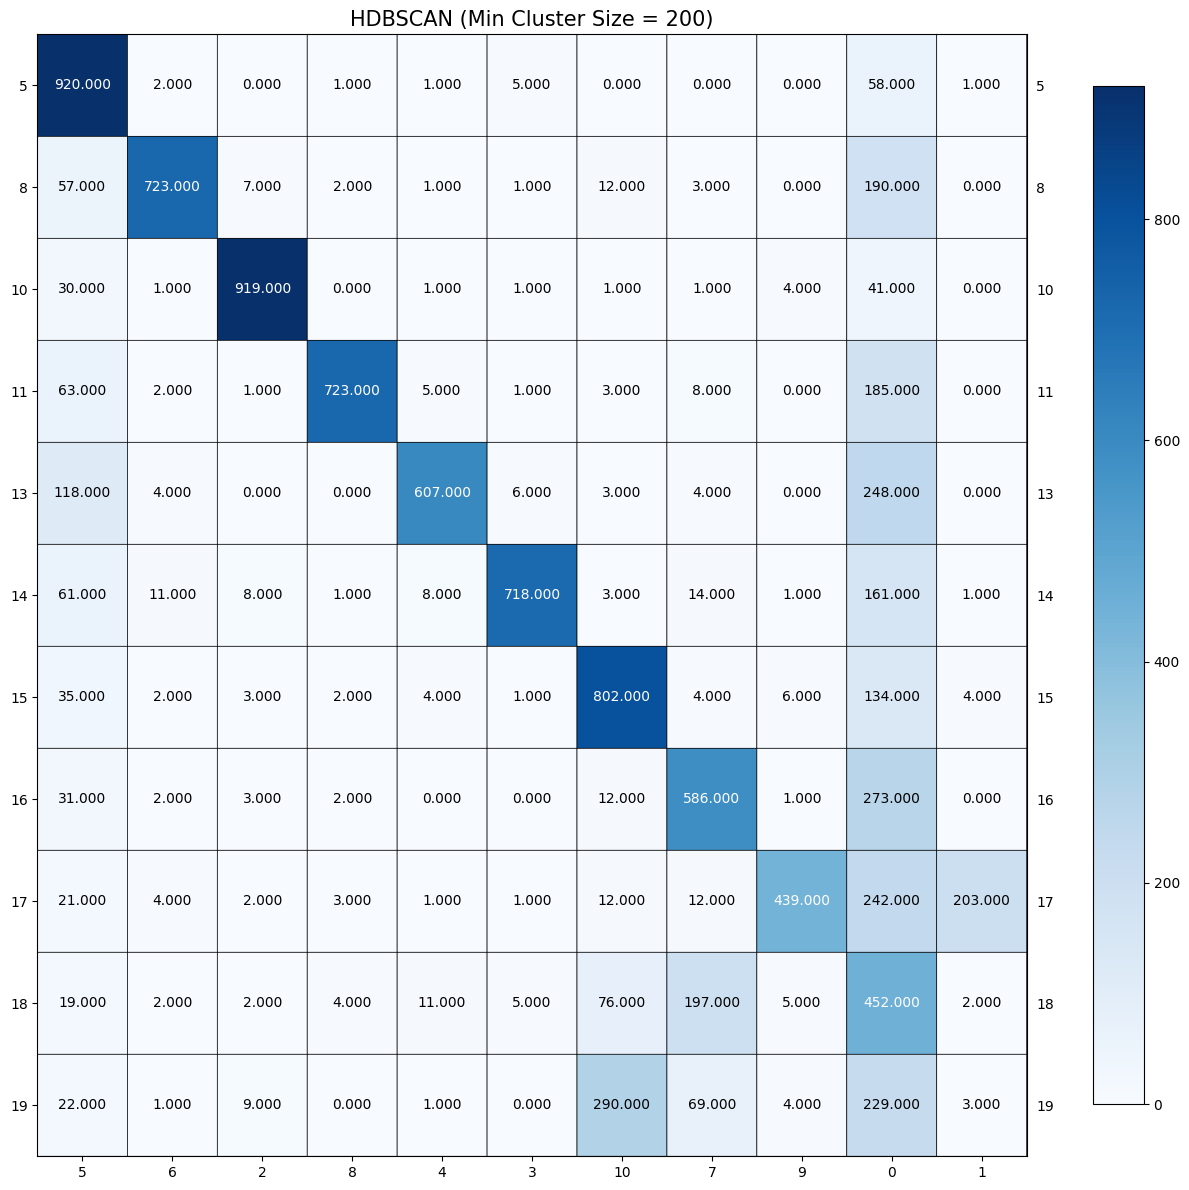

In [ ]:
hdb = hdbscan.HDBSCAN(min_cluster_size=200).fit(Umap_cos)
print('Number of Clusters: %i' % hdb.labels_.max())
cm = contingency_matrix(dataset.target, hdb.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, title = 'HDBSCAN (Min Cluster Size = 200)', size=(12,12))


**QUESTION 17**

*Based on your experiments, which dimensionality reduction technique and clustering methods worked best together for 20-class text data and why? Follow the table below.*

The best dimensionality reduction techinique and clustering method pair is Umap cosine metric with 200 components and kmeans with k of 20.

Umap is nonlinear so it will preserve more complex relationships in the data set which helps with clustering, compared to svd which is linear. For this data set, we know that there are 20 classes so kmeans and agglomerative clustering will perform better than dbscan since we can define the number of clusters using the parameters.



# Part 2

In [1]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, homogeneity_score, v_measure_score, completeness_score

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

In [2]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin

In [3]:
!pip install umap-learn

!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.5 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=b122af249153970305b08eff0d22f863599ea5004d6f7a4a87740e0f35ec113e
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.1/116.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 58.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 85.3 MB/s eta 0:00:00
  Attempting uninstall: pyzmq
    Found existing installation: pyzmq 23.2.1
    Uninstalling pyzmq-23.2.1:
      Successfully uninstalled pyzmq-23.2.1
  Attempting uninstall: ipykerne

In [4]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 50.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039281 sha256=4c13586c3e0278480a5b2f4df28f072dc52a5c779dd37097ea13fc7e8bd3898f
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.8
    Uninstalling Cython-3.0.8:
      Successfully uninstalled Cython-3.0.8


In [5]:
import umap
import umap.plot

/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [6]:
import hdbscan

In [7]:
topics = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
data = fetch_20newsgroups(subset = 'all', categories=topics, remove=('headers', 'footers'))

In [8]:
count_vect = CountVectorizer(stop_words='english', min_df=3)
X_train_counts = count_vect.fit_transform(data.data)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(7882, 23522)


## Question 19, 20

In [9]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out)
            return out

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 179MB/s]
100%|██████████| 58/58 [00:31<00:00,  1.84it/s]


QUESTION 19:

In a brief paragraph discuss: If the VGG network is trained on a dataset with perhaps totally different classes as targets, why would one expect the features derived from such a network to have discriminative power for a custom dataset?

- The features learned from the VGG network are generic representations of the image data, in other words, the general image pattern and structure. We can use these patterns to classify images of a different problem as it has the ability to analysis image data with the pre-trained patterns. Therefore, the VGG network trained with a dataset different from our custom dataset can still read the image information and output the feature.

QUESTION 20:

In a brief paragraph explain how the helper code base is performing feature extraction.

- The feature extraction of the helper code starts with downloading the training data './flowers_features_and_labels.npz' after checking if it is not downloaded yet.
- The Feature Extractor class contains a sequential neural network that performs pooling, flattening, and classifying by using VGG16 for the forward path.
- The usage of GPU is enabled as cuda, so when running this function, user should remeber to connect to the gpu.
- For the downloaded dataset './flower_photos', the code trasforms the dataset into a trainable shape, by resizing the image by 224x224, crop the image by te center, convert the data into a tensor and normalize them. After trasformation, it uses the DataLoader function to enable iterations within the data.
- Finally the Feature Extractor class operates over the processed data and vectorizes the feature into a length of 4096 vector, and saves the VGG feature vectors and the labels into a .npz file.

## Question 21, 22

In [10]:
from PIL import Image

filepath2 = "/content/flower_photos/daisy/10172379554_b296050f82_n.jpg"

img1 = Image.open (filepath2)

width1, height1 = img1.size

print ("The dimensions of the image are:", width1, "x", height1) # 320 x 215 = 68800

The dimensions of the image are: 320 x 215


In [11]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]
print(num_features)

(3670, 4096) (3670,)
4096


QUESTION 21:

How many pixels are there in the original images?
- width x height = 320 x 215
- 68800 pixels


How many features does the VGG network extract per image; i.e what is the dimension of each feature vector for an image sample?

- 4096 features


QUESTION 22:

Are the extracted features dense or sparse? (Compare with sparse TF-IDF features in text.)

- The extracted features for the image data is dense.

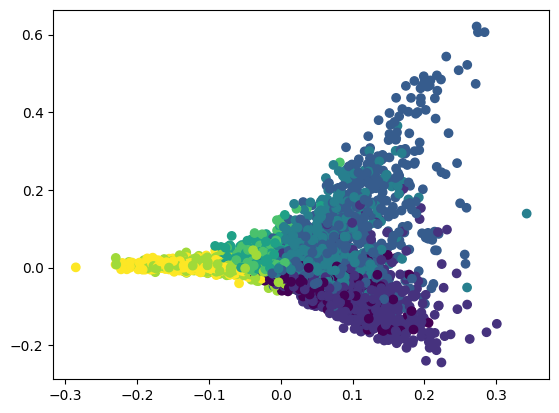

In [12]:
A = np.squeeze(np.asarray(X_train_tfidf.todense()))

t_pca = PCA(n_components=2).fit_transform(A)
plt.scatter(*t_pca.T, c=data.target)

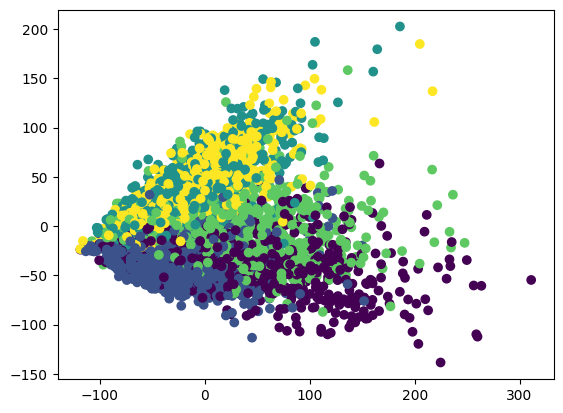

In [13]:
f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)

## Question 23

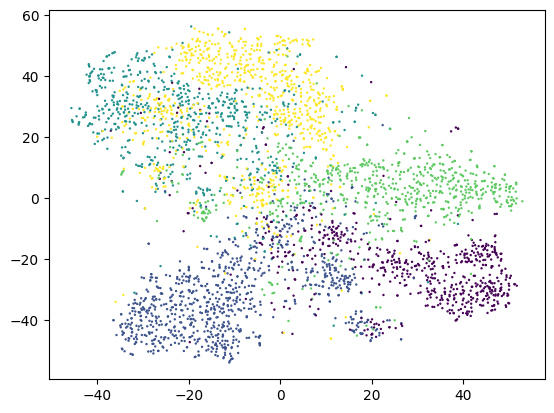

In [14]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

data = np.load('flowers_features_and_labels.npz')

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(data['f_all'])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s = 0.5, c = data['y_all'])
plt.show()

QUESTION 23: In order to inspect the high-dimensional features, t-SNE is a popular off-the-shelf choice for visualizing Vision features. Map the features you have extracted onto 2 dimensions with t-SNE. Then plot the mapped feature vectors along x and y axes. Color-code the data points with ground-truth labels. Describe your observation.

- There are five different classes as colored differently. As the different colored data point clusters are mostly seperable based on the area, we can see classification based on clutering is properly visualized by the t-SNE.

## Question 24

QUESTION 24: Report the best result (in terms of rand score) within the table below.
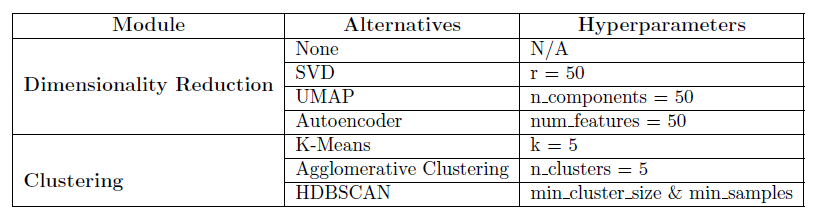

For HDBSCAN, introduce a conservative parameter grid over min cluster size and min samples.

For HDBSCAN, trying min_cluster_size = [5, 10, 20, 50], and min_samples = [1, 5, 10, 20]

The best results were
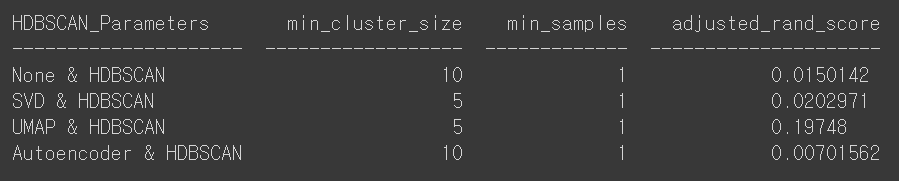

From the given table, using UMAP and K-Means gave the best result, adjusted random score 0.467592.

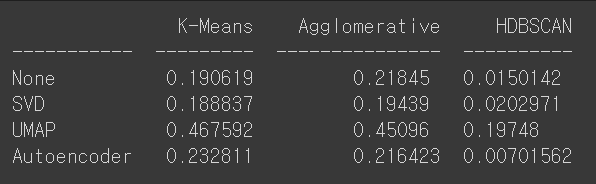

In [15]:
class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None

    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))

    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))

    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded

    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self

    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

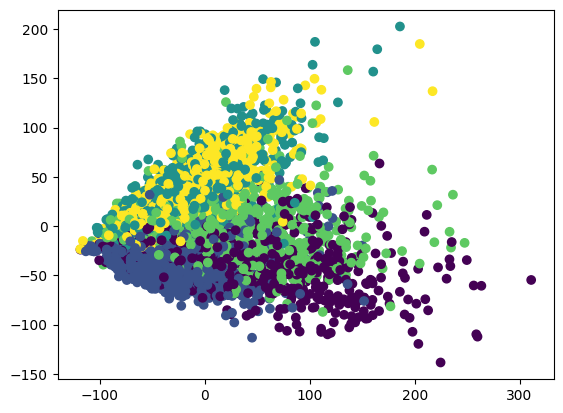

In [16]:
f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)

100%|██████████| 100/100 [00:19<00:00,  5.15it/s]


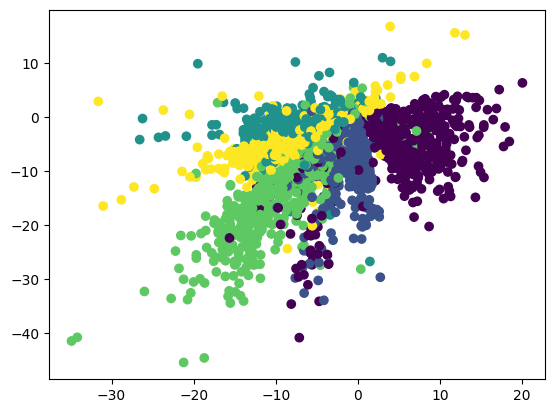

In [17]:
X_em =Autoencoder(2).fit_transform(f_all)
plt.scatter(*X_em.T, c=y_all)

In [18]:
X_data = data["f_all"]
y_data = data["y_all"]

X_svd = TruncatedSVD(n_components=50, random_state=0).fit_transform(X_data)
X_umap = umap.UMAP(n_components=50, metric = 'cosine').fit_transform(X_data)
X_autoencoder = Autoencoder(50).fit_transform(X_data)

100%|██████████| 100/100 [00:18<00:00,  5.32it/s]


### Testing HDBSCAN

In [19]:
from tabulate import tabulate

In [20]:
hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_5_1 = adjusted_rand_score(y_data, label_none_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=5, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_5_5 = adjusted_rand_score(y_data, label_none_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=10, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_5_10 = adjusted_rand_score(y_data, label_none_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=20, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_5_20 = adjusted_rand_score(y_data, label_none_hdb)

In [21]:
print('None & HDBSCAN : ', None_HDBSCAN_5_1)
print('None_HDBSCAN_5_5 : ', None_HDBSCAN_5_5)
print('None_HDBSCAN_5_10 : ', None_HDBSCAN_5_10)
print('None_HDBSCAN_5_20 : ', None_HDBSCAN_5_20)

None & HDBSCAN :  0.014983034591038287
None_HDBSCAN_5_5 :  0.006675668759554497
None_HDBSCAN_5_10 :  0.0
None_HDBSCAN_5_20 :  0.0


In [22]:
hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_5 = adjusted_rand_score(y_data, label_none_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_10 = adjusted_rand_score(y_data, label_none_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=1, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_20 = adjusted_rand_score(y_data, label_none_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=1, prediction_data=True).fit(X_data)
label_none_hdb = hdb.labels_
None_HDBSCAN_50 = adjusted_rand_score(y_data, label_none_hdb)

In [23]:
print('None & HDBSCAN : ', None_HDBSCAN_5)
print('None_HDBSCAN_10 : ', None_HDBSCAN_10)
print('None_HDBSCAN_20 : ', None_HDBSCAN_20)
print('None_HDBSCAN_50 : ', None_HDBSCAN_50)

None & HDBSCAN :  0.014983034591038287
None_HDBSCAN_10 :  0.015014212771105666
None_HDBSCAN_20 :  0.0
None_HDBSCAN_50 :  0.0


In [24]:
hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, prediction_data=True).fit(X_svd)
label_svd_hdb = hdb.labels_
SVD_HDBSCAN_5 = adjusted_rand_score(y_data, label_svd_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1, prediction_data=True).fit(X_svd)
label_svd_hdb = hdb.labels_
SVD_HDBSCAN_10 = adjusted_rand_score(y_data, label_svd_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, prediction_data=True).fit(X_umap)
label_umap_hdb = hdb.labels_
UMAP_HDBSCAN_5 = adjusted_rand_score(y_data, label_umap_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1, prediction_data=True).fit(X_umap)
label_umap_hdb = hdb.labels_
UMAP_HDBSCAN_10 = adjusted_rand_score(y_data, label_umap_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=1, prediction_data=True).fit(X_autoencoder)
label_auto_hdb = hdb.labels_
Autoencoder_HDBSCAN_5 = adjusted_rand_score(y_data, label_auto_hdb)

hdb = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1, prediction_data=True).fit(X_autoencoder)
label_auto_hdb = hdb.labels_
Autoencoder_HDBSCAN_10 = adjusted_rand_score(y_data, label_auto_hdb)

In [25]:
print('SVD & HDBSCAN_5 : ', SVD_HDBSCAN_5)
print('SVD & HDBSCAN_10 : ', SVD_HDBSCAN_10)
print('UMAP & HDBSCAN_5 : ', UMAP_HDBSCAN_5)
print('UMAP & HDBSCAN_10 : ', UMAP_HDBSCAN_10)
print('Autoencoder & HDBSCAN_5 : ', Autoencoder_HDBSCAN_5)
print('Autoencoder & HDBSCAN_10 : ', Autoencoder_HDBSCAN_10)

SVD & HDBSCAN_5 :  0.02253331412884546
SVD & HDBSCAN_10 :  0.027262268805319737
UMAP & HDBSCAN_5 :  0.18535162364353452
UMAP & HDBSCAN_10 :  0.0945246169287157
Autoencoder & HDBSCAN_5 :  0.005276810618061742
Autoencoder & HDBSCAN_10 :  0.0240887657265409


In [26]:
input = [X_data, X_svd, X_umap, X_autoencoder]
best_mincluster = [10, 5, 5, 10]
best_minsample = [1, 1, 1, 1]
scores = [None_HDBSCAN_10, SVD_HDBSCAN_5, UMAP_HDBSCAN_5, Autoencoder_HDBSCAN_10]

col_names = ["HDBSCAN_Parameters", "min_cluster_size", "min_samples", "adjusted_rand_score"]

data = [["None & HDBSCAN",best_mincluster[0], best_minsample[0], scores[0]],
        ["SVD & HDBSCAN",best_mincluster[1], best_minsample[1], scores[1]],
        ["UMAP & HDBSCAN",best_mincluster[2], best_minsample[2], scores[2]],
        ["Autoencoder & HDBSCAN",best_mincluster[3], best_minsample[3], scores[3]]]

print(tabulate(data, headers=col_names))

HDBSCAN_Parameters       min_cluster_size    min_samples    adjusted_rand_score
---------------------  ------------------  -------------  ---------------------
None & HDBSCAN                         10              1              0.0150142
SVD & HDBSCAN                           5              1              0.0225333
UMAP & HDBSCAN                          5              1              0.185352
Autoencoder & HDBSCAN                  10              1              0.0240888


### Score comparison

In [27]:
# None and KMeans
kmeans = KMeans(n_clusters=5).fit(X_data)
label_none_kmeans = kmeans.labels_
None_Kmeans = adjusted_rand_score(y_data, label_none_kmeans)

# SVD and KMeans
kmeans = KMeans(n_clusters=5).fit(X_svd)
label_svd_kmeans = kmeans.labels_
SVD_Kmeans = adjusted_rand_score(y_data, label_svd_kmeans)

# UMAP and KMeans
kmeans = KMeans(n_clusters=5).fit(X_umap)
label_umap_kmeans = kmeans.labels_
UMAP_Kmeans = adjusted_rand_score(y_data, label_umap_kmeans)

# Autoencoder and KMeans
kmeans = KMeans(n_clusters=5).fit(X_autoencoder)
label_auto_kmeans = kmeans.labels_
Autoencoder_Kmeans = adjusted_rand_score(y_data, label_auto_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [28]:
# None and Agglomerative
agg = AgglomerativeClustering(n_clusters = 5, linkage='ward').fit(X_data)
label_none_agg = agg.labels_
None_Agglomerative = adjusted_rand_score(y_data, label_none_agg)

# SVD and Agglomerative
agg = AgglomerativeClustering(n_clusters = 5, linkage='ward').fit(X_svd)
label_svd_agg = agg.labels_
SVD_Agglomerative = adjusted_rand_score(y_data, label_svd_agg)

# UMAP and Agglomerative
agg = AgglomerativeClustering(n_clusters = 5, linkage='ward').fit(X_umap)
label_umap_agg = agg.labels_
UMAP_Agglomerative = adjusted_rand_score(y_data, label_umap_agg)

# Autoencoder and Agglomerative
agg = AgglomerativeClustering(n_clusters = 5, linkage='ward').fit(X_autoencoder)
label_auto_agg = agg.labels_
Autoencoder_Agglomerative = adjusted_rand_score(y_data, label_auto_agg)

In [29]:
print('None & Kmeans : ', None_Kmeans)
print('SVD & Kmeans: ', SVD_Kmeans)
print('UMAP & Kmeans : ', UMAP_Kmeans)
print('Autoencoder & Kmeans: ', Autoencoder_Kmeans)
print('-----------------------')
print('None & Agglomerative : ', None_Agglomerative)
print('SVD & Agglomerative: ', SVD_Agglomerative)
print('UMAP & Agglomerative : ', UMAP_Agglomerative)
print('Autoencoder & Agglomerative: ', Autoencoder_Agglomerative)

None & Kmeans :  0.19289005000734466
SVD & Kmeans:  0.19647718797412642
UMAP & Kmeans :  0.46649835671936546
Autoencoder & Kmeans:  0.19562086490499953
-----------------------
None & Agglomerative :  0.2184499487113686
SVD & Agglomerative:  0.1427161050758648
UMAP & Agglomerative :  0.4734899990171398
Autoencoder & Agglomerative:  0.25719450849712766


In [30]:
col_names = ["K-Means", "Agglomerative", "HDBSCAN"]

data = [["None", None_Kmeans, None_Agglomerative, None_HDBSCAN_10],
        ["SVD", SVD_Kmeans, SVD_Agglomerative, SVD_HDBSCAN_5],
        ["UMAP", UMAP_Kmeans, UMAP_Agglomerative, UMAP_HDBSCAN_5],
        ["Autoencoder", Autoencoder_Kmeans, Autoencoder_Agglomerative, Autoencoder_HDBSCAN_10]]

print(tabulate(data, headers=col_names))

               K-Means    Agglomerative    HDBSCAN
-----------  ---------  ---------------  ---------
None          0.19289          0.21845   0.0150142
SVD           0.196477         0.142716  0.0225333
UMAP          0.466498         0.47349   0.185352
Autoencoder   0.195621         0.257195  0.0240888


## Question 25

QUESTION 25:

Report the test accuracy of the MLP classifier on the original VGG features.
- The test accuracy is 0.9169. (2nd trail : 0.9046)

Report the same when using the reduced-dimension features (you have freedom in choosing the dimensionality reduction algorithm and its parameters). Does the performance of the model suffer with the reduced-dimension representations? Is it significant? Does the success in classification make sense in the context of the clustering results obtained for the same features in Question 24.

- The accuracy for the reduced-dimension features is 0.8379 (2nd trial : 0.8678). Yes, the accuracy drops by 0.08 (to 0.04)when the dimensions are reduced. This is in contrast to the results in question 24 where UMAP improved the adjusted random score.

In [31]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True),
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()


    def forward(self, X):
        return self.model(X)

    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()

        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                optimizer.zero_grad()

                output = self(X_)
                loss = criterion(output, y_)

                loss.backward()
                optimizer.step()
                #raise NotImplementedError
        return self

    def eval(self, X_test, y_test):
        self.model.eval()

        num_correct = 0

        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')

        output = self(X_test)
        _, predictions = torch.max(output, 1)

        num_correct += torch.sum(predictions == y_test)
        num_examples = len(y_test)
        accuracy = num_correct / num_examples
        return accuracy
        #raise NotImplementedError

In [34]:
# test original dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)


MLP_classification = MLP(num_features = 4096).train(X_train, y_train)
MLP_classification.eval(X_test, y_test)

100%|██████████| 100/100 [00:07<00:00, 14.13it/s]


tensor(0.9046, device='cuda:0')

In [36]:
# test dimensionally reduced dataset
X_umap = umap.UMAP(n_components=50, metric = 'cosine').fit_transform(X_data)

X_train_umap, X_test_umap, y_train, y_test = train_test_split(X_umap, y_data, test_size=0.2)



In [37]:
print(X_umap.shape)

(3670, 50)


In [38]:
print(X_train_umap.shape)
print(X_test_umap.shape)
print(y_train.shape)
print(y_test.shape)

(2936, 50)
(734, 50)
(2936,)
(734,)


In [39]:
MLP_classification = MLP(num_features = 50).train(X_train_umap, y_train)
MLP_classification.eval(X_test_umap, y_test)


100%|██████████| 100/100 [00:05<00:00, 18.04it/s]


tensor(0.8678, device='cuda:0')

# Part 3 (Seperate notebook)

QUESTION 26: Try to construct various text queries regarding types of Pokemon (such as ”type: Bug”, ”electric type Pok´emon” or ”Pok´emon with fire abilities”) to find the relevant images from the dataset. Once you have found the most suitable template for queries, please find the top five most relevant Pokemon for type Bug, Fire and Grass. For each of the constructed query, please plot the five most relevant Pokemon horizontally in one figure with following specifications:

• the title of the figure should be the query you used;

• the title of each Pokemon should be the name of the Pokemon and its first and second type.

Repeat this process for Pokemon of Dark and Dragon types. Assess the effectiveness of your queries
in these cases as well and try to explain any differences.

In [ ]:
!pip install datasets transformers numpy pandas Pillow matplotlib
!pip install torch tqdm scipy
!pip install git+https://github.com/openai/CLIP.git
!pip install plotly umap-learn

In [ ]:
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
import numpy as np
import pandas as pd
from glob import glob
from PIL import Image
import matplotlib.pyplot as plt
import clip
import torch
from tqdm import tqdm
from scipy.special import softmax
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE

In [ ]:
# load csv file and image paths to construct pokedex, use type_to_load=None to load all types, else use a list of types 1 to load
def construct_pokedex(csv_path='Pokemon.csv', image_dir='./images/', type_to_load=None):
    pokedex = pd.read_csv(csv_path)
    image_paths = []

    for pokemon_name in pokedex["Name"]:
        imgs = glob(f"{image_dir}/{pokemon_name}/0.jpg")
        if len(imgs) > 0:
            image_paths.append(imgs[0])
        else:
            image_paths.append(None)

    pokedex["image_path"] = image_paths
    pokedex = pokedex[pokedex["image_path"].notna()].reset_index(drop=True)

    # only keep pokemon with distinct id
    ids, id_counts = np.unique(pokedex["ID"], return_counts=True)
    ids, id_counts = np.array(ids), np.array(id_counts)
    keep_ids = ids[id_counts == 1]

    pokedex = pokedex[pokedex["ID"].isin(keep_ids)].reset_index(drop=True)
    pokedex["Type2"] = pokedex["Type2"].str.strip()
    if type_to_load is not None:
        pokedex = pokedex[pokedex["Type1"].isin(type_to_load)].reset_index(drop=True)
    return pokedex

# load clip model
def load_clip_model():
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-L/14", device=device)
    return model, preprocess, device

# inference clip model on a list of image path
def clip_inference_image(model, preprocess, image_paths, device):
    image_embeddings = []
    with torch.no_grad():
        for img_path in tqdm(image_paths):
            img = Image.open(img_path)
            img_preprocessed = preprocess(img).unsqueeze(0).to(device)
            image_embedding = model.encode_image(img_preprocessed).detach().cpu().numpy()
            image_embeddings += [image_embedding]

    image_embeddings = np.concatenate(image_embeddings, axis=0)
    image_embeddings /= np.linalg.norm(image_embeddings, axis=-1, keepdims=True)
    return image_embeddings

# inference clip model on a list of texts
def clip_inference_text(model, preprocess, texts, device):
    with torch.no_grad():
        text_embeddings = model.encode_text(clip.tokenize(texts).to(device)).detach().cpu().numpy()
    text_embeddings /= np.linalg.norm(text_embeddings, axis=-1, keepdims=True)
    return text_embeddings

# compute similarity of texts to each image
def compute_similarity_text_to_image(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=-1)
    return similarity

# compute similarity of iamges to each text
def compute_similarity_image_to_text(image_embeddings, text_embeddings):
    similarity = softmax((100.0 * image_embeddings @ text_embeddings.T), axis=0)
    return similarity

# Use TSNE to project CLIP embeddings to 2D space
def umap_projection(image_embeddings, n_neighbors=15, min_dist=0.1, metric='cosine'):
    distance_matrix = np.zeros((image_embeddings.shape[0], image_embeddings.shape[0]))
    for i in range(image_embeddings.shape[0]):
        for j in range(image_embeddings.shape[0]):
            if i == j:
                distance_matrix[i, j] = 1
            else:
                distance_matrix[i, j] = np.dot(image_embeddings[i], image_embeddings[j])
    distance_matrix = 1 - distance_matrix
    reducer = TSNE(n_components=2, metric="precomputed", init="random", random_state=42)
    visualization_data = reducer.fit_transform(distance_matrix)
    return visualization_data

QUESTION 27: Randomly select 10 Pokemon images from the dataset and use CLIP to find the most relevant types (use your preferred template, e.g ”type: Bug”). For each selected Pokemon, please plot it and indicate:

• its name and first and second type;

• the five most relevant types predicted by CLIP and their predicted probabilities.

QUESTION 28: In the first and second question, we investigated how CLIP creates ’clusters’ by mapping images and texts of various Pokemon into a high-dimensional space and explored neighborhood of these items in this space. For this question, please use t-SNE to visualize image clusters, specifically for Pokemon types Bug, Fire, and Grass. You can use scatter plot from python package plotly. For the visualization, color-code each point based on its first type type 1 using the ’color’argument, and label each point with the Pokemon’s name and types using ’hover name’. This will enable you to identify each Pokemon represented in your visualization. After completing the visualization, analyze it and discuss whether the clustering of Pokemon types make sense to you.